# The Evolution of the Marvel Cinematic Universe

Since its inception in 2008, the Marvel Cinematic Universe has become one of the largest movie franchises in the world, garnering a huge fan base and building an incredibly complex world throughout a single, cohesive narrative. Through this data story, I hope to capture how the MCU has changed over time from its first phase to its most recently completed phase: phase 3. 

In [349]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
from datetime import datetime
import operator

## Retrieving the Data

I will be using 3 datasets obtained from Kaggle. The first one, `movies_metadata.csv`, contains a collection of around 45,000 movies released on or before July 2017 with data on genre, release date, runtime, revenue, production companies, and more. The second one, `credits.csv`, contains both cast and crew credits for each movie in `movies_metadata.csv`. The third and main dataset I will be using is `mcu dataset.csv`, which has information about every Marvel movie from phases 1-3.

Let's open my datasets and gather the information that I need.

In [350]:
all_movies = pd.read_csv('movies_metadata.csv')
all_movies.head()

C:\Users\jennz\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [351]:
credits = pd.read_csv('credits.csv')
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [352]:
mcu = pd.read_csv("mcu dataset.csv")
mcu

,Name,US release Date,Director,Producer,Duration,Genre,IMDB rating,metascore,Cast,Budget,Domestic Gross,Total Gross,Opening Gross,Oscar Nomination,Oscar won,Phase
0,Iron Man,"May 2, 2008",Jon Favreau,Avi Arad and Kevin Feige,2h 6min,"Action , Adventure, Sci-Fi",7.9,79,"Robert Downey Jr. , Gweneth Paltrow , Terrence...","$140,000,000","$318,604,126","$585,366,247","$98,618,668",2,0,1
1,The incredible Hulk,"June 13, 2008",Louis Leterrier,"Avi Arad ,Gale Ann Hurd and Kevin Feige",1h 52min,"Action , Adventure, Sci-Fi",6.6,61,"Edward Norton , Liv Tyler , Tim Roth","$150,000,000","$134,806,913","$264,770,996","$55,414,050",0,0,1
2,Iron Man 2,"May 7, 2010",Jon Favreau,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",7.0,57,"Robert Downey Jr. , Gweneth Paltrow , Mickey R...","$200,000,000","$312,433,331","$623,933,331","$128,122,480",1,0,1
3,Thor,"May 6, 2011",Kenneth Branagh,Kevin Feige,1h 55min,"Action , Adventure, Fantasy",7.0,57,"Chris Hemsworth , Anthony Hopkins , Natalie Po...","$150,000,000","$181,030,624","$449,326,618","$65,723,338",0,0,1
4,Captain America: The first Avenger,"July 22, 2011",Joe Jhonston,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",6.9,66,"Chris Evans , Hugo Weaving , Samuel L. Jackson","$140,000,000","$176,654,505","$370,569,774","$65,058,524",0,0,1
5,Marvel's the Avengers,"May 4, 2012",Joss Whedon,Kevin Feige,2h 23min,"Action , Adventure, Sci-Fi",8.0,69,"Robert Downey Jr. , Chris Evans , Scarlett Joh...","$220,000,000","$623,357,910","$1,518,812,988","$207,438,708",1,0,1
6,Iron Man 3,"May 3, 2013",Shane Black,Kevin Feige,2h 10min,"Action , Adventure, Sci-Fi",7.1,62,"Robert Downey Jr. , Gweneth Paltrow , Guy Pearce","$200,000,000","$408,992,272","$1,214,811,252","$174,144,585",1,0,2
7,Thor: The dark world,"November 8, 2013",Alan Taylor,Kevin Feige,1h 52min,"Action , Adventure, Fantasy",6.8,54,"Chris Hemsworth , Natalie Portman , Tom Hiddl...","$170,000,000","$206,362,140","$644,783,140","$85,737,841",0,0,2
8,Captain America : The Winter Soldier,"April 4, 2014",Anthony and Joe Russo,Kevin Feige,2h 16min,"Action , Adventure, Sci-Fi",7.7,70,"Chris Evans , Scarlett Johansson , Samuel L. J...","$170,000,000","$259,746,958","$714,421,503","$95,023,721",1,0,2
9,Guardians Of the Galaxy,"August 1, 2014",James Gunn,Kevin Feige,2h 1min,"Action, Adventure , Comedy",8.0,76,"Chris Patt , Vin Diesel , Bradely Cooper","$170,000,000","$333,714,112","$772,776,600","$94,320,883",2,0,2


Note that some of the Marvel movies are not formatted correctly or use different names than what is typically used (such as Marvel's The Avengers). Let's fix that so we can compare titles with the `movies_metadata.csv` dataset!

In [353]:
mcu.loc[1, 'Name'] = 'The Incredible Hulk'
mcu.loc[4, 'Name'] = 'Captain America: The First Avenger'
mcu.loc[5, 'Name'] = 'The Avengers'
mcu.loc[7, 'Name'] = 'Thor: The Dark World'
mcu.loc[8, 'Name'] = 'Captain America: The Winter Soldier'
mcu.loc[9, 'Name'] = 'Guardians of the Galaxy'
mcu.loc[10, 'Name'] = 'Avengers: Age of Ultron'
mcu.loc[13, 'Name'] = 'Doctor Strange'
mcu.loc[16, 'Name'] = 'Thor: Ragnarok'
mcu.loc[20, 'Name'] = 'Captain Marvel'
mcu.loc[21, 'Name'] = 'Avengers: Endgame'
mcu.loc[22, 'Name'] = 'Spider-Man: Far From Home'

Now, I'm going to get the movie ids from `movies_metadata.csv` to the MCU dataset.

In [354]:
# Create columns for the additional data
mcu['id'] = 0

In [355]:
for n in mcu['Name']:
    query = all_movies[all_movies.title == n] # Gets all movies with title n
    
    # Takes care of the possibility of there being more than one movie with the same name
    for i in query.index:
        
        # Check if one of movie's production companies is Marvel Studios
        if "Marvel Studios" in query.loc[i, "production_companies"]:
            row = query.loc[i] # The correct movie is stored here
            
            # add id to mcu dataframe
            x = mcu["Name"] == n
            mcu.loc[mcu.index[x], 'id'] = int(row['id'])
mcu

,Name,US release Date,Director,Producer,Duration,Genre,IMDB rating,metascore,Cast,Budget,Domestic Gross,Total Gross,Opening Gross,Oscar Nomination,Oscar won,Phase,id
0,Iron Man,"May 2, 2008",Jon Favreau,Avi Arad and Kevin Feige,2h 6min,"Action , Adventure, Sci-Fi",7.9,79,"Robert Downey Jr. , Gweneth Paltrow , Terrence...","$140,000,000","$318,604,126","$585,366,247","$98,618,668",2,0,1,1726
1,The Incredible Hulk,"June 13, 2008",Louis Leterrier,"Avi Arad ,Gale Ann Hurd and Kevin Feige",1h 52min,"Action , Adventure, Sci-Fi",6.6,61,"Edward Norton , Liv Tyler , Tim Roth","$150,000,000","$134,806,913","$264,770,996","$55,414,050",0,0,1,1724
2,Iron Man 2,"May 7, 2010",Jon Favreau,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",7.0,57,"Robert Downey Jr. , Gweneth Paltrow , Mickey R...","$200,000,000","$312,433,331","$623,933,331","$128,122,480",1,0,1,10138
3,Thor,"May 6, 2011",Kenneth Branagh,Kevin Feige,1h 55min,"Action , Adventure, Fantasy",7.0,57,"Chris Hemsworth , Anthony Hopkins , Natalie Po...","$150,000,000","$181,030,624","$449,326,618","$65,723,338",0,0,1,10195
4,Captain America: The First Avenger,"July 22, 2011",Joe Jhonston,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",6.9,66,"Chris Evans , Hugo Weaving , Samuel L. Jackson","$140,000,000","$176,654,505","$370,569,774","$65,058,524",0,0,1,1771
5,The Avengers,"May 4, 2012",Joss Whedon,Kevin Feige,2h 23min,"Action , Adventure, Sci-Fi",8.0,69,"Robert Downey Jr. , Chris Evans , Scarlett Joh...","$220,000,000","$623,357,910","$1,518,812,988","$207,438,708",1,0,1,24428
6,Iron Man 3,"May 3, 2013",Shane Black,Kevin Feige,2h 10min,"Action , Adventure, Sci-Fi",7.1,62,"Robert Downey Jr. , Gweneth Paltrow , Guy Pearce","$200,000,000","$408,992,272","$1,214,811,252","$174,144,585",1,0,2,68721
7,Thor: The Dark World,"November 8, 2013",Alan Taylor,Kevin Feige,1h 52min,"Action , Adventure, Fantasy",6.8,54,"Chris Hemsworth , Natalie Portman , Tom Hiddl...","$170,000,000","$206,362,140","$644,783,140","$85,737,841",0,0,2,76338
8,Captain America: The Winter Soldier,"April 4, 2014",Anthony and Joe Russo,Kevin Feige,2h 16min,"Action , Adventure, Sci-Fi",7.7,70,"Chris Evans , Scarlett Johansson , Samuel L. J...","$170,000,000","$259,746,958","$714,421,503","$95,023,721",1,0,2,100402
9,Guardians of the Galaxy,"August 1, 2014",James Gunn,Kevin Feige,2h 1min,"Action, Adventure , Comedy",8.0,76,"Chris Patt , Vin Diesel , Bradely Cooper","$170,000,000","$333,714,112","$772,776,600","$94,320,883",2,0,2,118340


Okay, now let's add the cast and crew information found in `credits.csv` by using the movie ids. First, I created two functions that will help us remove the ids and other unnecessary information from the credits. Then, I get the credits from the dataset, use the functions on them, and add them to the MCU dataset.

In [356]:
def cleanCastCredits(info):
    """ Remove ids and other unnecessary information from the cast credits
    
    Keyword Arguments:
    info -- a string containing the credits of the cast
    """
    
    lst = info.split("\'")
    creds = {}
    index = 0
    
    # Add each character and its gender and actor to the dictionary
    for i in range(lst.count('character')):
        index = lst.index('character', index+1) # index+1 allows program to search for next 'character'
        
        # Keeps the apostrophe if it is part of the character name
        if len(lst[index+1]) > 2:
            lst[index+2] = lst[index+1][3:] + "'" + lst[index+2]
            
        # Keeps the apostrophe if it is part of the actor's name
        if len(lst[index+13]) > 2:
            lst[index+14] = lst[index+13][3:] + "'" + lst[index+14]
            
        creds[lst[index+2]] = {'gender': lst[index+9].strip(': ,'), 'actor': lst[index+14]}
        
    return [creds]

def cleanCrewCredits(info):
    """ Remove ids and other unnecessary information from the crew credits
    
    Keyword Arguments:
    info -- a string containing the credits of the crew
    """
    
    lst = info.split("'")
    creds = {}
    index = 0
    
    # Add each crew member and their gender, department, and job to the dictionary
    for i in range(lst.count('name')):
        index = lst.index('name', index+1) # index+1 allows program to search for next 'name'
        
        # Keeps the apostrophe if it is part of the name
        if len(lst[index+1]) > 2:
            lst[index+2] = lst[index+1][3:] + "'" + lst[index+2]
        
        creds[lst[index+2]] = {'gender': lst[index-7].strip(': ,'), 'department': lst[index-10], 'job': lst[index-2]}
        
    return [creds]

In [357]:
# New columns
mcu['cast'] = None
mcu['crew'] = None

for iD in mcu['id']:
    # movie has no id --> do nothing
    if iD == 0:
        continue
        
    query = credits[credits.id == int(iD)] # gets the credits that match with the id
    
    index = query.index[0] # row index of credits

    # add cast and crew info to dataframe
    x = mcu['id'] == int(iD)
    mcu.loc[mcu.index[x], 'cast'] = cleanCastCredits(query.loc[index, 'cast'])
    mcu.loc[mcu.index[x], 'crew'] = cleanCrewCredits(query.loc[index, 'crew'])
mcu

,Name,US release Date,Director,Producer,Duration,Genre,IMDB rating,metascore,Cast,Budget,Domestic Gross,Total Gross,Opening Gross,Oscar Nomination,Oscar won,Phase,id,cast,crew
0,Iron Man,"May 2, 2008",Jon Favreau,Avi Arad and Kevin Feige,2h 6min,"Action , Adventure, Sci-Fi",7.9,79,"Robert Downey Jr. , Gweneth Paltrow , Terrence...","$140,000,000","$318,604,126","$585,366,247","$98,618,668",2,0,1,1726,"{'Tony Stark / Iron Man': {'gender': '2', 'act...","{'Sarah Finn': {'gender': '1', 'department': '..."
1,The Incredible Hulk,"June 13, 2008",Louis Leterrier,"Avi Arad ,Gale Ann Hurd and Kevin Feige",1h 52min,"Action , Adventure, Sci-Fi",6.6,61,"Edward Norton , Liv Tyler , Tim Roth","$150,000,000","$134,806,913","$264,770,996","$55,414,050",0,0,1,1724,"{'Bruce Banner / The Hulk': {'gender': '2', 'a...","{'Gale Anne Hurd': {'gender': '1', 'department..."
2,Iron Man 2,"May 7, 2010",Jon Favreau,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",7.0,57,"Robert Downey Jr. , Gweneth Paltrow , Mickey R...","$200,000,000","$312,433,331","$623,933,331","$128,122,480",1,0,1,10138,"{'Tony Stark / Iron Man': {'gender': '2', 'act...","{'Justin Theroux': {'gender': '2', 'department..."
3,Thor,"May 6, 2011",Kenneth Branagh,Kevin Feige,1h 55min,"Action , Adventure, Fantasy",7.0,57,"Chris Hemsworth , Anthony Hopkins , Natalie Po...","$150,000,000","$181,030,624","$449,326,618","$65,723,338",0,0,1,10195,"{'Thor Odinson': {'gender': '2', 'actor': 'Chr...","{'Paul Rubell': {'gender': '2', 'department': ..."
4,Captain America: The First Avenger,"July 22, 2011",Joe Jhonston,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",6.9,66,"Chris Evans , Hugo Weaving , Samuel L. Jackson","$140,000,000","$176,654,505","$370,569,774","$65,058,524",0,0,1,1771,{'Steve Rogers / Captain America': {'gender': ...,"{'Alan Silvestri': {'gender': '2', 'department..."
5,The Avengers,"May 4, 2012",Joss Whedon,Kevin Feige,2h 23min,"Action , Adventure, Sci-Fi",8.0,69,"Robert Downey Jr. , Chris Evans , Scarlett Joh...","$220,000,000","$623,357,910","$1,518,812,988","$207,438,708",1,0,1,24428,"{'Tony Stark / Iron Man': {'gender': '2', 'act...","{'Alan Silvestri': {'gender': '2', 'department..."
6,Iron Man 3,"May 3, 2013",Shane Black,Kevin Feige,2h 10min,"Action , Adventure, Sci-Fi",7.1,62,"Robert Downey Jr. , Gweneth Paltrow , Guy Pearce","$200,000,000","$408,992,272","$1,214,811,252","$174,144,585",1,0,2,68721,"{'Tony Stark / Iron Man': {'gender': '2', 'act...","{'Shane Black': {'gender': '2', 'department': ..."
7,Thor: The Dark World,"November 8, 2013",Alan Taylor,Kevin Feige,1h 52min,"Action , Adventure, Fantasy",6.8,54,"Chris Hemsworth , Natalie Portman , Tom Hiddl...","$170,000,000","$206,362,140","$644,783,140","$85,737,841",0,0,2,76338,"{'Thor': {'gender': '2', 'actor': 'Chris Hemsw...","{'Priscilla John': {'gender': '1', 'department..."
8,Captain America: The Winter Soldier,"April 4, 2014",Anthony and Joe Russo,Kevin Feige,2h 16min,"Action , Adventure, Sci-Fi",7.7,70,"Chris Evans , Scarlett Johansson , Samuel L. J...","$170,000,000","$259,746,958","$714,421,503","$95,023,721",1,0,2,100402,{'Steve Rogers / Captain America': {'gender': ...,"{'Sarah Finn': {'gender': '1', 'department': '..."
9,Guardians of the Galaxy,"August 1, 2014",James Gunn,Kevin Feige,2h 1min,"Action, Adventure , Comedy",8.0,76,"Chris Patt , Vin Diesel , Bradely Cooper","$170,000,000","$333,714,112","$772,776,600","$94,320,883",2,0,2,118340,"{'Peter Quill / Star-Lord': {'gender': '2', 'a...","{'Craig Wood': {'gender': '2', 'department': '..."


It looks like all movies up to _Guardians of the Galaxy Vol. 2_ + _Thor: Ragnarok_ has been completely taken care of. As for the rest of the movies, I have manually created a dataset called `missing_credits.csv` from IMDb that will fill in the blanks. The cast list will include all major characters in the movie, but the crew list will only have the director(s) and producer(s) since I would be here all day if I wanted to include everyone who was involved in making the movie.

In [358]:
missing_creds = pd.read_csv('missing_credits.csv')

In [359]:
# Add Cast and Crew credits for Spider-Man: Homecoming
mcu.loc[15, 'cast'] = cleanCastCredits(missing_creds.loc[0, 'Cast'])
mcu.loc[15, 'crew'] = cleanCrewCredits(missing_creds.loc[0, 'Crew'])

In [360]:
# Add Cast and Crew credits for rest of movies starting at index 17 (Black Panther)
for i in range(6):
    mcu.loc[i + 17, 'cast'] = cleanCastCredits(missing_creds.loc[i + 1, 'Cast'])
    mcu.loc[i + 17, 'crew'] = cleanCrewCredits(missing_creds.loc[i + 1, 'Crew'])

Okay. Now let's clean up the date, duration, and money values so they are more computer readable.

In [361]:
# First, fix Domestic Gross for index 16 and 17 since they are missing a 0
mcu.loc[16, 'Domestic Gross'] += '0'
mcu.loc[17, 'Domestic Gross'] += '0'

In [362]:
cols = mcu.columns
for i in cols:
    if " " in i:
        new = i.replace(" ", "_")
        mcu.rename(columns={i:new}, inplace=True)
        
for i in range(len(mcu)):
    
    # Change date to something more computer readable
    date = mcu.loc[i, 'US_release_Date']
    datetime = datetime.strptime(date, '%B %d, %Y')
    mcu.loc[i, 'US_release_Date'] = datetime
    
    # Change Duration to all minutes
    duration = mcu.loc[i, 'Duration']
    mcu.loc[i, 'Duration'] = int(duration[0:1]) * 60 + int(duration[3:-3])
    
    # Remove $ and commas
    mcu.loc[i, 'Budget'] = mcu.loc[i, 'Budget'].replace(',', '')
    mcu.loc[i, 'Budget'] = mcu.loc[i, 'Budget'].replace('$', '')
    mcu.loc[i, 'Budget'] = int(mcu.loc[i, 'Budget'])
    mcu.loc[i, 'Domestic_Gross'] = mcu.loc[i, 'Domestic_Gross'].replace(',', '')
    mcu.loc[i, 'Domestic_Gross'] = mcu.loc[i, 'Domestic_Gross'].replace('$', '')
    mcu.loc[i, 'Domestic_Gross'] = int(mcu.loc[i, 'Domestic_Gross'])
    mcu.loc[i, 'Total_Gross'] = mcu.loc[i, 'Total_Gross'].replace(',', '')
    mcu.loc[i, 'Total_Gross'] = mcu.loc[i, 'Total_Gross'].replace('$', '')
    mcu.loc[i, 'Total_Gross'] = int(mcu.loc[i, 'Total_Gross'])
    mcu.loc[i, 'Opening_Gross'] = mcu.loc[i, 'Opening_Gross'].replace(',', '')
    mcu.loc[i, 'Opening_Gross'] = mcu.loc[i, 'Opening_Gross'].replace('$', '')
    mcu.loc[i, 'Opening_Gross'] = int(mcu.loc[i, 'Opening_Gross'])
mcu

,Name,US_release_Date,Director,Producer,Duration,Genre,IMDB_rating,metascore,Cast,Budget,Domestic_Gross,Total_Gross,Opening_Gross,Oscar_Nomination,Oscar_won,Phase,id,cast,crew
0,Iron Man,2008-05-02 00:00:00,Jon Favreau,Avi Arad and Kevin Feige,126,"Action , Adventure, Sci-Fi",7.9,79,"Robert Downey Jr. , Gweneth Paltrow , Terrence...",140000000,318604126,585366247,98618668,2,0,1,1726,"{'Tony Stark / Iron Man': {'gender': '2', 'act...","{'Sarah Finn': {'gender': '1', 'department': '..."
1,The Incredible Hulk,2008-06-13 00:00:00,Louis Leterrier,"Avi Arad ,Gale Ann Hurd and Kevin Feige",112,"Action , Adventure, Sci-Fi",6.6,61,"Edward Norton , Liv Tyler , Tim Roth",150000000,134806913,264770996,55414050,0,0,1,1724,"{'Bruce Banner / The Hulk': {'gender': '2', 'a...","{'Gale Anne Hurd': {'gender': '1', 'department..."
2,Iron Man 2,2010-05-07 00:00:00,Jon Favreau,Kevin Feige,124,"Action , Adventure, Sci-Fi",7.0,57,"Robert Downey Jr. , Gweneth Paltrow , Mickey R...",200000000,312433331,623933331,128122480,1,0,1,10138,"{'Tony Stark / Iron Man': {'gender': '2', 'act...","{'Justin Theroux': {'gender': '2', 'department..."
3,Thor,2011-05-06 00:00:00,Kenneth Branagh,Kevin Feige,115,"Action , Adventure, Fantasy",7.0,57,"Chris Hemsworth , Anthony Hopkins , Natalie Po...",150000000,181030624,449326618,65723338,0,0,1,10195,"{'Thor Odinson': {'gender': '2', 'actor': 'Chr...","{'Paul Rubell': {'gender': '2', 'department': ..."
4,Captain America: The First Avenger,2011-07-22 00:00:00,Joe Jhonston,Kevin Feige,124,"Action , Adventure, Sci-Fi",6.9,66,"Chris Evans , Hugo Weaving , Samuel L. Jackson",140000000,176654505,370569774,65058524,0,0,1,1771,{'Steve Rogers / Captain America': {'gender': ...,"{'Alan Silvestri': {'gender': '2', 'department..."
5,The Avengers,2012-05-04 00:00:00,Joss Whedon,Kevin Feige,143,"Action , Adventure, Sci-Fi",8.0,69,"Robert Downey Jr. , Chris Evans , Scarlett Joh...",220000000,623357910,1518812988,207438708,1,0,1,24428,"{'Tony Stark / Iron Man': {'gender': '2', 'act...","{'Alan Silvestri': {'gender': '2', 'department..."
6,Iron Man 3,2013-05-03 00:00:00,Shane Black,Kevin Feige,130,"Action , Adventure, Sci-Fi",7.1,62,"Robert Downey Jr. , Gweneth Paltrow , Guy Pearce",200000000,408992272,1214811252,174144585,1,0,2,68721,"{'Tony Stark / Iron Man': {'gender': '2', 'act...","{'Shane Black': {'gender': '2', 'department': ..."
7,Thor: The Dark World,2013-11-08 00:00:00,Alan Taylor,Kevin Feige,112,"Action , Adventure, Fantasy",6.8,54,"Chris Hemsworth , Natalie Portman , Tom Hiddl...",170000000,206362140,644783140,85737841,0,0,2,76338,"{'Thor': {'gender': '2', 'actor': 'Chris Hemsw...","{'Priscilla John': {'gender': '1', 'department..."
8,Captain America: The Winter Soldier,2014-04-04 00:00:00,Anthony and Joe Russo,Kevin Feige,136,"Action , Adventure, Sci-Fi",7.7,70,"Chris Evans , Scarlett Johansson , Samuel L. J...",170000000,259746958,714421503,95023721,1,0,2,100402,{'Steve Rogers / Captain America': {'gender': ...,"{'Sarah Finn': {'gender': '1', 'department': '..."
9,Guardians of the Galaxy,2014-08-01 00:00:00,James Gunn,Kevin Feige,121,"Action, Adventure , Comedy",8.0,76,"Chris Patt , Vin Diesel , Bradely Cooper",170000000,333714112,772776600,94320883,2,0,2,118340,"{'Peter Quill / Star-Lord': {'gender': '2', 'a...","{'Craig Wood': {'gender': '2', 'department': '..."


There! Now my dataset is complete! On to the analysis!

## Data Analysis

Let's start by examining how the MCU's popularity changes over time. Perhaps the movie grosses would give us a good idea of this, considering that the more people are invested in the franchise, the more likely they are to see the newest movie being released (and perhaps even see it multiple times).

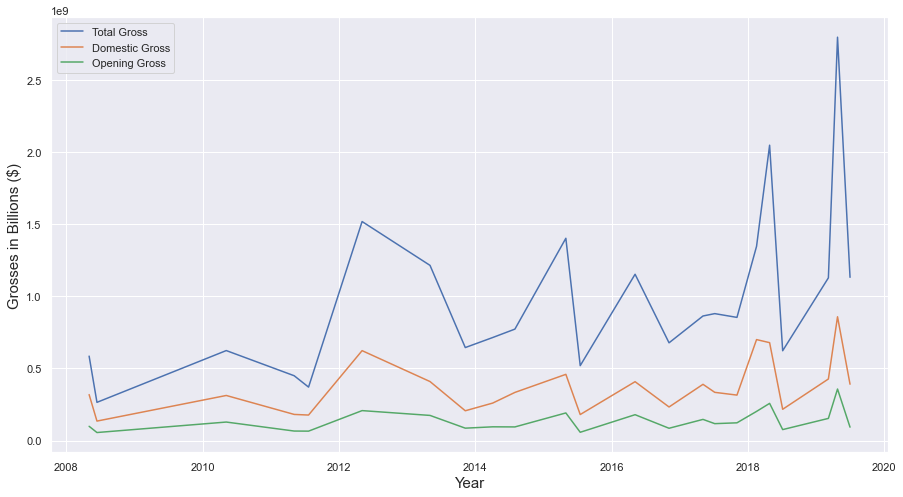

In [363]:
fig, ax = plt.subplots()
ax.set_xlabel("Year", fontsize = 15)
ax.set_ylabel("Grosses in Billions ($)", fontsize = 15)

ax = sns.lineplot(x=mcu.US_release_Date, y=mcu.Total_Gross)
ax1 = sns.lineplot(x=mcu.US_release_Date, y=mcu.Domestic_Gross)
ax2 = sns.lineplot(x=mcu.US_release_Date, y=mcu.Opening_Gross)
plt.legend(labels=["Total Gross","Domestic Gross", "Opening Gross"])
sns.set(rc = {'figure.figsize':(15,8)})

The graph reveals that the franchise really started gaining momentum after the release of _The Avengers_ in May 2012. Then, it hits a slump, which makes sense after the end of a phase. It spikes again for the end of Phase Two (_Avengers: Age of Ultron_: May 2015) and then again for _Captain America: Civil War_ and the two major blockbusters, _Avengers: Infinity War_ and _Avengers: Endgame_. This data shows that while the MCU's profits increase overall, people are most interested in the films that feature many superheroes at once.

Now, let's take a look at the IMDb ratings of each movie and see which ones viewers enjoy the most. Do they change over time?

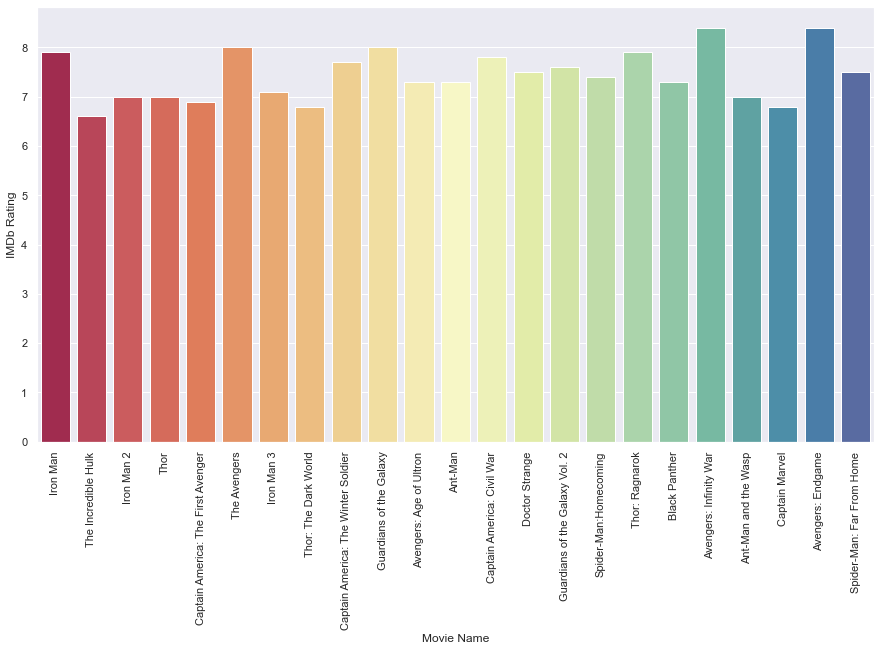

In [364]:
bplot = sns.barplot(x=mcu['Name'], y=mcu['IMDB_rating'], palette="Spectral")
bplot.set_xticklabels(bplot.get_xticklabels(),rotation = 90)
bplot.set(xlabel='Movie Name', ylabel='IMDb Rating')
sns.set(rc = {'figure.figsize':(15,8)})

Hmm, it appears that ratings fluctuates between 6 and 9 throughout the entire MCU timeline, with _Avengers: Infinity War_ and _Avengers: Endgame_ have the highest ones. That makes sense, considering how highly anticipated these films were and how they became the culmination of years of narrative and world-building. What about metascore, or the reviews given by critics?

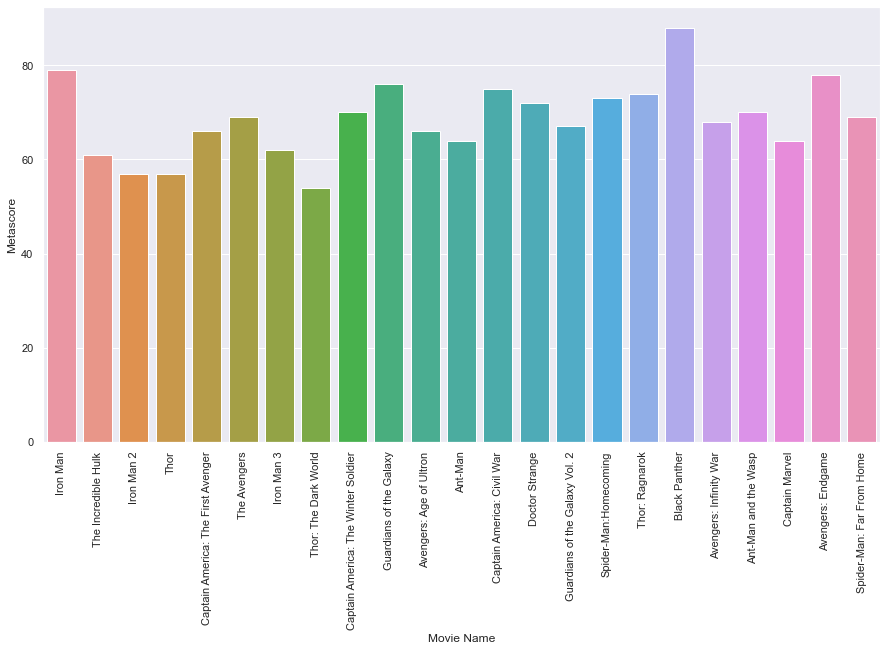

In [365]:
bplot = sns.barplot(x=mcu['Name'], y=mcu['metascore'])
bplot.set_xticklabels(bplot.get_xticklabels(),rotation = 90)
bplot.set(xlabel='Movie Name', ylabel='Metascore')
sns.set(rc = {'figure.figsize':(15,8)})

It looks like the critics slightly disagree with those ratings. It seems that they prefer movies that make the largest cultural impact on the world. With the highest metascore, _Black Panther_ made a huge impression on audiences with its black representation and celebration of African culture. _Iron Man_ came in second as the movie that started the entire franchise, and _Avengers: Endgame_ came in third as the movie that thousands of people flocked to theaters to see as the finale of a narrative that had been unfolding for almost 10 years. 

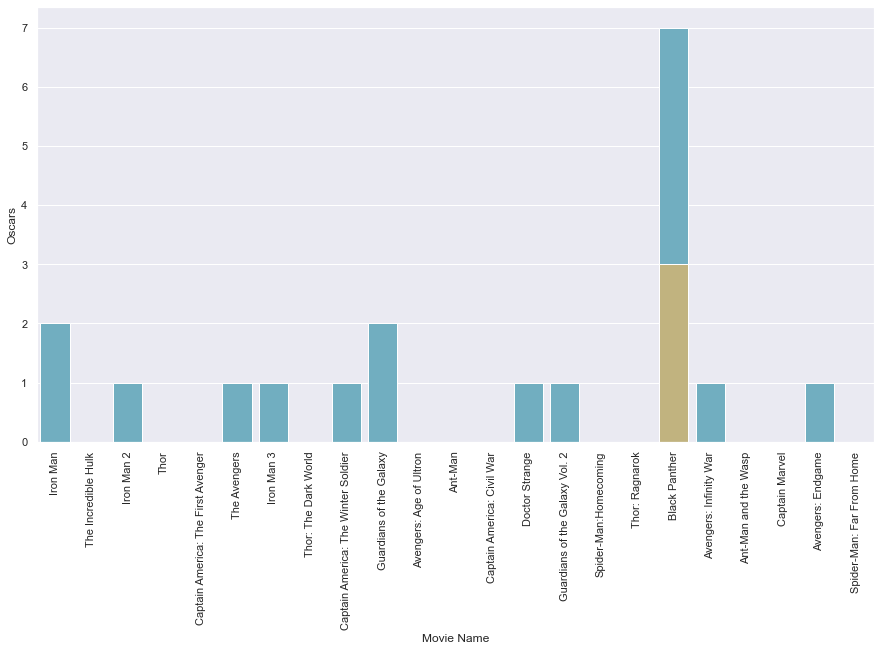

In [366]:
sp = plt.subplots()
sp = sns.barplot(x=mcu['Name'], y=mcu['Oscar_Nomination'], color='c')
sp = sns.barplot(x=mcu['Name'], y=mcu['Oscar_won'], color='y')
sp.set_xticklabels(sp.get_xticklabels(),rotation = 90)
sp.set(xlabel='Movie Name', ylabel='Oscars')
sns.set(rc = {'figure.figsize':(15,8)})

It seems that the Academy Awards agree somewhat with IMDb's critics. Most of the Oscar nominees have relatively good metascores, and the leading movie, _Black Panther_, won 3 out of 7 awards.

## The Network of the MCU

Now, let's see how different narratives within the Marvel universe grow and overlap over time. First, I need to set up a Graph and a couple of lists/dictionaries to keep track of customizations to the nodes.

In [1048]:
G = nx.Graph()
labels = {}
nodelist = []
nodesize = []
nodecolor = []
gendercolor = []

In [1049]:
colors = {'0': 'orange', '1': 'pink', '2': '#03cffc', \
            'Iron Man': '#a02c4f', 'The Incredible Hulk': '#b84659', 'Iron Man 2': '#cb5c5e', 'Thor': '#d56b5b', \
            'Captain America: The First Avenger': '#df7d5b', 'The Avengers': '#e49467', 'Iron Man 3': '#e8a972', \
            'Thor: The Dark World': '#ecbd81', 'Captain America: The Winter Soldier': '#eecf91', \
            'Guardians of the Galaxy': '#f1dea1', 'Avengers: Age of Ultron': '#f4ebb4', 'Ant-Man': '#f7f7c6', \
            'Captain America: Civil War': '#edf1b8', 'Doctor Strange': '#e2eca9', 'Guardians of the Galaxy Vol. 2': '#d2e4a6', \
            'Spider-Man:Homecoming': '#c0dca9', 'Thor: Ragnarok': '#abd4ab', 'Black Panther': '#90c6a6', \
            'Avengers: Infinity War': '#77b9a2', 'Ant-Man and the Wasp': '#5fa2a2', 'Captain Marvel': '#4d8ea8', \
            'Avengers: Endgame': '#4a7da8', 'Spider-Man: Far From Home': '#596ba1'}
def get_color(string):
    return colors[string]

In [1050]:
def get_abbr(string):
    arr = string.split(' ')
    abbr = ""
    for i in arr:
        if i[0:1].isalnum() or i[0:1] == '/':
            abbr += i[0:1]
    return abbr

In [1051]:
def add_nodes(title, dictionary, num):
    characters = list(dictionary.keys())
    characters = characters[0:num]

    for char in characters:
        if char not in labels:
            labels[char] = get_abbr(char)
            nodecolor.append(get_color(title))
            if dictionary[char]['gender'].isnumeric():
                gendercolor.append(get_color(dictionary[char]['gender']))
            else:
                gendercolor.append('orange')
            nodesize.append(0)
            nodelist.append(char)
            G.add_nodes_from(char)

    for char in characters:
        for c in characters:
            if char != c:
                if char not in nodelist or c not in nodelist:
                    continue
                index1 = nodelist.index(char)
                index2 = nodelist.index(c)
                nodesize[index1] += 10
                nodesize[index2] += 10
                G.add_edge(char, c)

There! Now, it all began with _Iron Man_ in 2008, when billionaire and inventor Tony Stark builds an iron suit to escape terrorists looking to build a terrible weapon created by his company. 

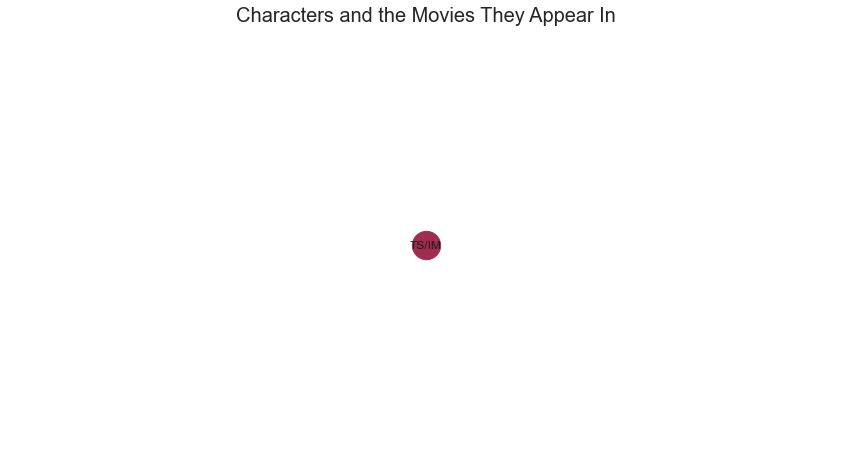

In [1052]:
title = mcu.loc[0, 'Name']
iron_man = mcu.loc[0, 'cast']
character = list(iron_man.keys())[0]
abbr = get_abbr(character)

if character not in labels:
    labels[character] = abbr
    nodecolor.append(get_color(title))
    nodesize.append(800)
    nodelist.append(character)
    gendercolor.append(get_color(iron_man[character]['gender']))

    G.add_node(character)
    
plt.title("Characters and the Movies They Appear In", fontsize=20)
nx.draw(G, with_labels=True, labels=labels, node_color=nodecolor, node_size=nodesize, nodelist=nodelist)

This is a node representing Tony Stark/Iron Man. The maroon color indicates that the character first made an appearance in _Iron Man_. Let's add the other characters and connect them all to each other since they belong to the same movie. Note: I will only be adding 25 characters from each movie to avoid overwhelming the graph.

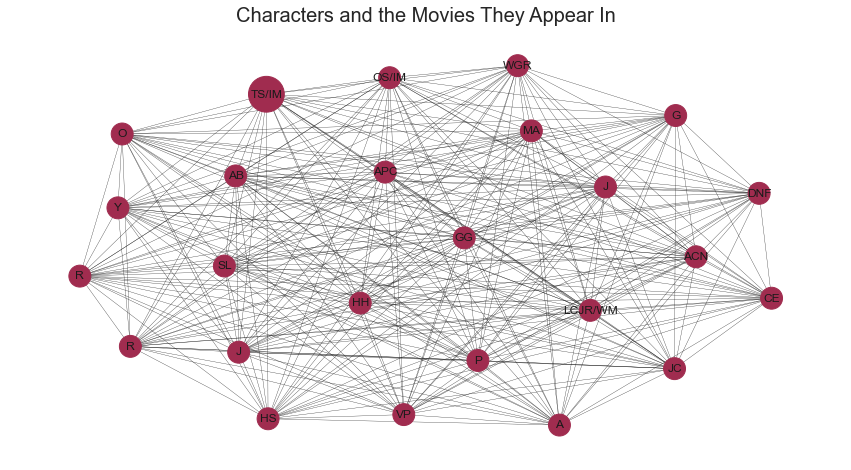

In [1053]:
add_nodes(mcu.loc[0, 'Name'], mcu.loc[0, 'cast'], 25)
plt.title("Characters and the Movies They Appear In", fontsize=20)
nx.draw(G, with_labels=True, labels=labels, node_color=nodecolor, node_size=nodesize, nodelist=nodelist, width=0.3)

That's a lot of connections. Let's see what happens when we add all the other origin story movies in Phase 1.

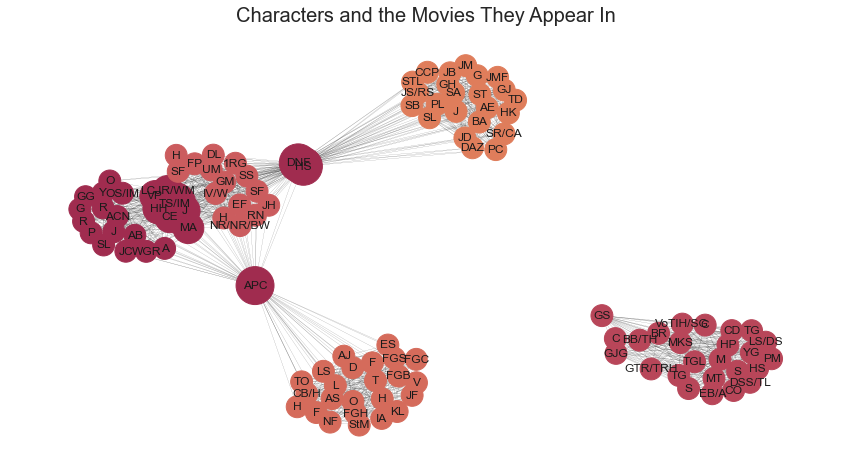

In [1054]:
query = mcu[mcu.Phase == 1]
query = query[query.Name != 'Iron Man']
query = query[query.Name != 'The Avengers']
index = list(query.index)

for i in index:
    add_nodes(mcu.loc[i, 'Name'], mcu.loc[i, 'cast'], 25)

pos = nx.spring_layout(G, k=0.2, iterations=20)
plt.title("Characters and the Movies They Appear In", fontsize=20)
nx.draw(G, pos, with_labels=True, labels=labels, node_color=nodecolor, node_size=nodesize, nodelist=nodelist, width=0.1)

As you can see, the MCU began with 5 movies that were only connected by a few characters such as Agent Peggy Carter (APC) and Howard Start (HS). _The Incredible Hulk_ (identified by the cluster with BB/TH for Bruce Banner / The Hulk) has no connections at all. But then _The Avengers_ is released.

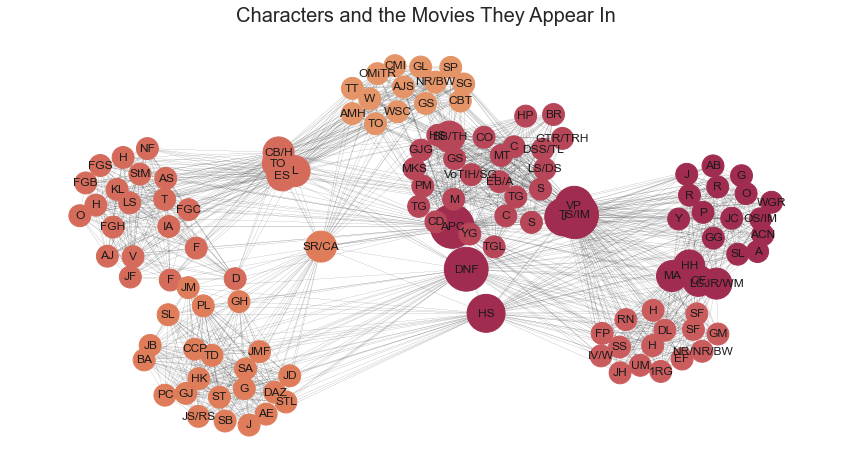

In [1055]:
add_nodes(mcu.loc[5, 'Name'], mcu.loc[5, 'cast'], 25)

pos = nx.spring_layout(G, k=0.2, iterations=20)
plt.title("Characters and the Movies They Appear In", fontsize=20)
nx.draw(G, pos, with_labels=True, labels=labels, node_color=nodecolor, node_size=nodesize, nodelist=nodelist, width=0.1)

With _The Avengers_, the MCU started coming together, which probably contributed to the spike shown earlier in the Grosses line graph. Main heroes such as The Hulk (BB/TH), Captain America (SR/CA), and Iron Man became bridges between character clusters and rose in importance.

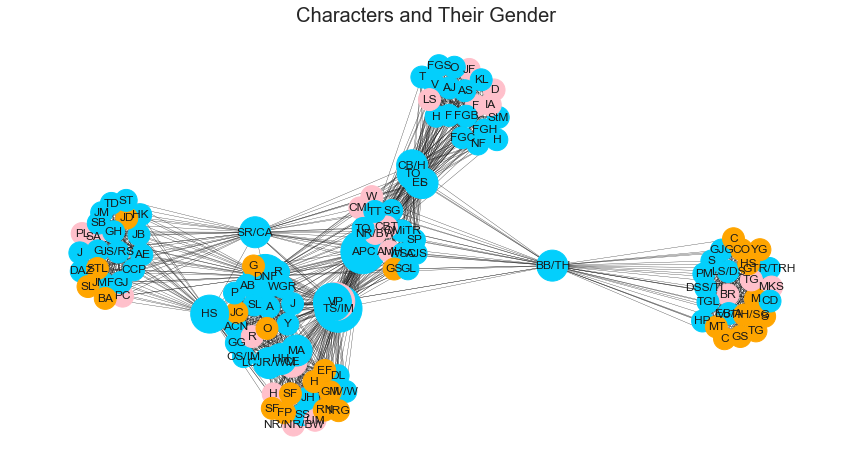

In [1056]:
plt.title("Characters and Their Gender", fontsize=20)
nx.draw(G, with_labels=True, labels=labels, node_color=gendercolor, node_size=nodesize, nodelist=nodelist, width=0.3)

However, as you can see, Phase One of the MCU lacked in representation. All except one of the major heroes are men (shown in blue), and there are only a few women in each cluster of characters (shown in pink). The orange nodes indicate other or unknown gender. Let's see what changes in Phase Two.

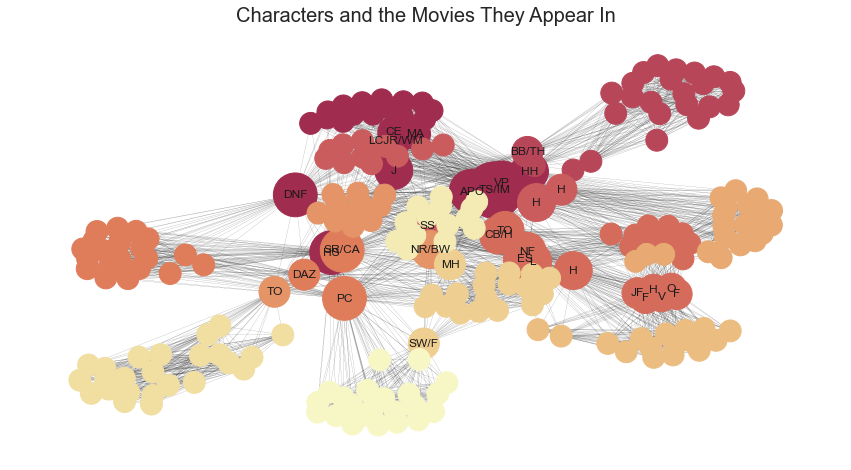

In [1057]:
query = mcu[mcu.Phase == 2]
index = list(query.index)

for i in index:
    add_nodes(mcu.loc[i, 'Name'], mcu.loc[i, 'cast'], 25)

labels_copy = labels.copy()
keys = list(labels_copy.keys())
for key in keys:
    index = keys.index(key)
    if nodesize[index] < 500:
        labels_copy[key] = ""
    
pos = nx.spring_layout(G, k=0.2, iterations=20)
plt.title("Characters and the Movies They Appear In", fontsize=20)
nx.draw(G, pos, with_labels=True, labels=labels_copy, node_color=nodecolor, node_size=nodesize, nodelist=nodelist, width=0.1)

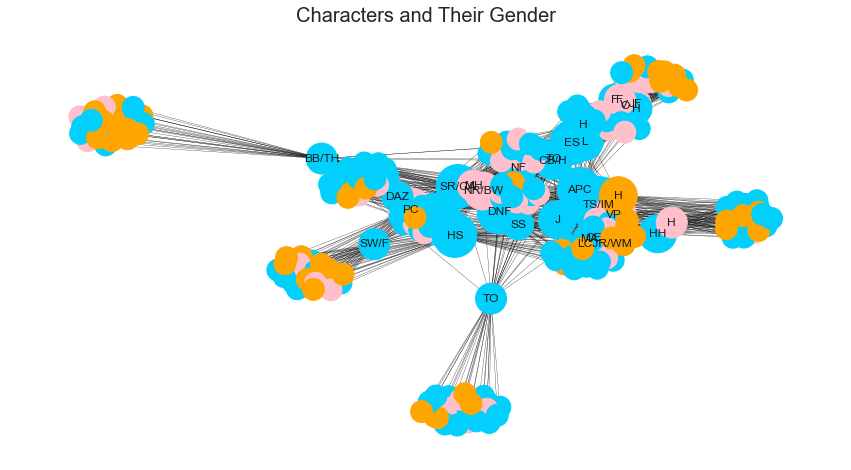

In [1058]:
pos = nx.spring_layout(G, k=0.2, iterations=20)
plt.title("Characters and Their Gender", fontsize=20)
nx.draw(G, pos, with_labels=True, labels=labels_copy, node_color=gendercolor, node_size=nodesize, nodelist=nodelist, width=0.1)

The universe is expanding! More and more heroes are being pulled into the middle, some of them being women. Others are newly introduced, making the amount of character abbreviations overwhelming, so I only kept the ones associated with the largest of the nodes. Most of the ones with text remaining are still men, but there are a few more women being included.

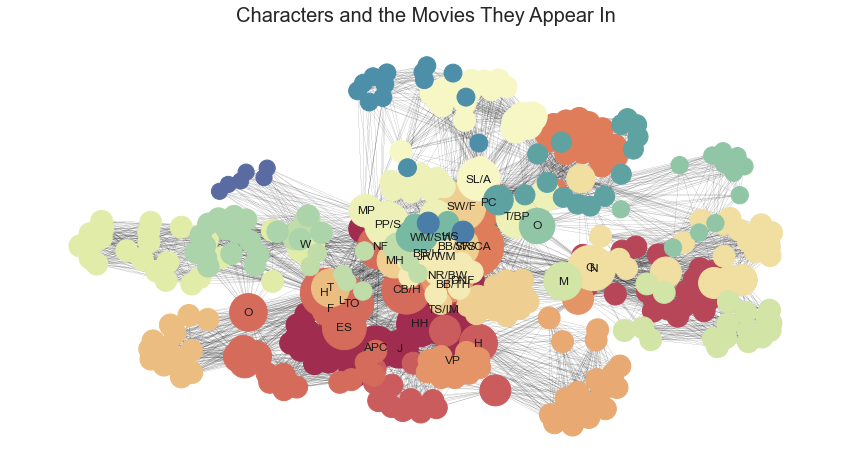

In [1059]:
query = mcu[mcu.Phase == 3]
index = list(query.index)

for i in index:
    add_nodes(mcu.loc[i, 'Name'], mcu.loc[i, 'cast'], 25)

labels_copy = labels.copy()
keys = list(labels_copy.keys())
for key in keys:
    index = keys.index(key)
    if nodesize[index] < 1000:
        labels_copy[key] = ""
    
pos = nx.spring_layout(G, k=0.2, iterations=20)
plt.title("Characters and the Movies They Appear In", fontsize=20)
nx.draw(G, pos, with_labels=True, labels=labels_copy, node_color=nodecolor, node_size=nodesize, nodelist=nodelist, width=0.1)


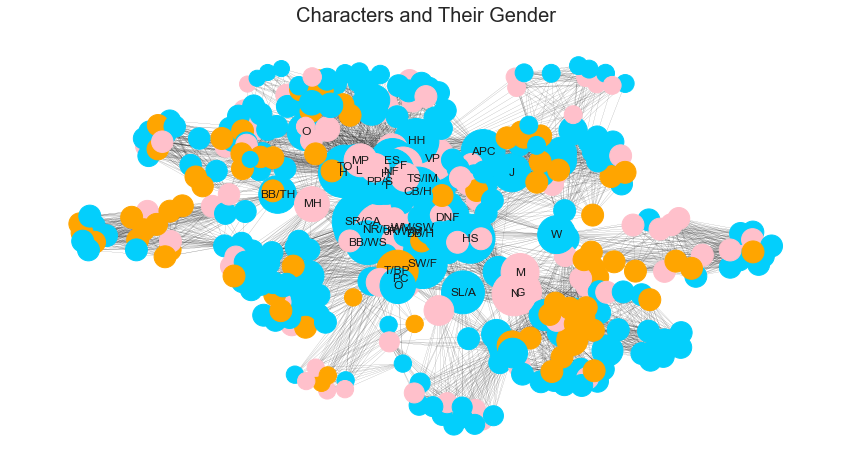

In [1062]:
pos = nx.spring_layout(G, k=0.2, iterations=20)
plt.title("Characters and Their Gender", fontsize=20)
nx.draw(G, pos, with_labels=True, labels=labels_copy, node_color=gendercolor, node_size=nodesize, nodelist=nodelist, width=0.1)

By the end of Phase Three, my graph is a huge splash of colors, with many heroes appearing in different narratives of the MCU as shown by the number of nodes in the center. We still see some clusters on the edges that indicate that some characters stayed within a single movie, but for the most part, the MCU network is beginning to look more like a complicated net. Looking at the gender graph, we see a lot more women getting in on the action such as Wanda Maximoff a.k.a. Scarlett Witch (WM/SW). Though male appearances still outnumber females, the MCU is looking to be on the right track in regards to women representation. Perhaps some day, the number of major female heroes will match the number of males, and I hope that Marvel will include represenation for people of other genders in the near future. 

### Summary of MCU Network

In [1074]:
d = dict(nx.degree(G))
sorted_d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))
l = list(sorted_d)

print('Top 10 heroes with most appearances: ')
print(l[:10])
print('\nGender Counts:')
print('Male:', gendercolor.count('#03cffc'), ': Female:', gendercolor.count('pink'), ': Other/Unknown:', gendercolor.count('orange'))

Top 10 heroes with most appearances: 
['Tony Stark / Iron Man', 'Steve Rogers / Captain America', 'Howard Stark', 'Loki', 'Natasha Romanoff / Black Widow', 'Heimdall', 'Nick Fury', 'Clint Barton / Hawkeye', 'Peggy Carter', 'Sam Wilson / Falcon']

Gender Counts:
Male: 223 : Female: 87 : Other/Unknown: 77


## Final Thoughts

Insert Final Thoughts Here